In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

file_path = '~//projects//Data_Science//DataSets//'
df = pd.read_csv(file_path + 'marketing_campaign.csv', sep = '\t')


In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

Now that we have the data read, lets look at some basic statistics of that data. 

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We're gonna change the Year_Birth column to age because it's not as clear as age. We'll calculate the age based off the year of the most recent customer visit, which is the column Dt_Customer.

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.Dt_Customer.max()


Timestamp('2014-12-06 00:00:00')

We converted our dt_customer so it can be read as an acutal date and return the correct most recent date. So we will use the year 2014 to calculate the age of our customers.

In [6]:
df['Year_Birth'] =2014 - df.Year_Birth
df = df.rename(columns = {'Year_Birth':'Age'})

Now that we've finished converting ages, we will convert people who have their education listed as 2n Cycle to Masters because a 2nd cycle is equivalent to a masters in other countries. 

In [7]:
df.loc[df.Education == '2n Cycle', 'Education' ] = 'Master'

Now we'll cleanup people's marital status

In [8]:
df.groupby('Marital_Status').size()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

We'll merge Absurd, Alone, and Yolo with single since there all the same thing, but we'll keep divorced, widow, and single separate because these are very distinct types of relationships.

In [9]:
def marital_merge(x):
    if x in ['Absurd', 'YOLO', 'Alone']:
        return 'Single'
    else:
        return x
    
df['Marital_Status'] = df.Marital_Status.apply(marital_merge)
df.groupby('Marital_Status').size()


    

Marital_Status
Divorced    232
Married     864
Single      487
Together    580
Widow        77
dtype: int64

The last two things we should do is check for people that are too old to be alive and if there is any missing data. We'll drop anyone who is over or equal the age 105 years old.

In [10]:
drop_ages = df.loc[df.Age >=105].index
df  = df.drop(drop_ages)
df.Age.sort_values(ascending = False)

1950    74
424     73
1923    71
358     71
894     71
        ..
696     19
2213    19
1850    19
1170    18
46      18
Name: Age, Length: 2237, dtype: int64

In [11]:
df.isnull().sum()

ID                      0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

So the only points in our data set that are missing right now are in the income section. I'm going to decide to leave those data points in for now because they could be useful for analyzing other relationships that don't have much to do with income. Now that we have our data a little more cleaned, we're first going to discover how education might affect how successfull a campaing is. So we'll first group our data by education and look at the mean of different categories.

In [12]:
education = df.groupby('Education')
education_means= education.mean()
education_means


,ID,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Education,,,,,,,,,,,,,,,,,,,,,
Basic,5396.407407,36.537037,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,...,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.037037
Graduation,5652.523514,44.364685,52720.373656,0.444543,0.494232,50.035492,284.268855,30.774623,179.488909,43.149956,...,5.287489,0.069210,0.071872,0.076309,0.072760,0.014197,0.012422,3.0,11.0,0.134871
Master,5455.208406,45.045534,51056.333925,0.462347,0.490368,47.835377,286.245184,24.315236,156.063047,37.656743,...,5.278459,0.068301,0.071804,0.066550,0.056042,0.007005,0.008757,3.0,11.0,0.138354
PhD,5628.311340,47.818557,56088.258333,0.402062,0.600000,48.509278,403.773196,19.793814,167.791753,26.569072,...,5.268041,0.082474,0.092784,0.078351,0.061856,0.020619,0.002062,3.0,11.0,0.208247


We're mainly interested in how the education level one obtains relates to how much a person accepts each different ad campaing, so we'll reduce our table down to columns that just contain the mean acceptance rate of each add program. 

In [13]:
education_means = education_means.iloc[:, 17:22] 
def convert_to_percent(x):
    return x * 100
education_means = education_means.apply(convert_to_percent)
education_means


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
Education,,,,,
Basic,11.111111,0.000000,0.000000,0.000000,0.000000
Graduation,6.921029,7.187223,7.630878,7.275954,1.419698
Master,6.830123,7.180385,6.654991,5.604203,0.700525
PhD,8.247423,9.278351,7.835052,6.185567,2.061856


<AxesSubplot:title={'center':'Acceptance of Ad Campaigns'}, ylabel='Education'>

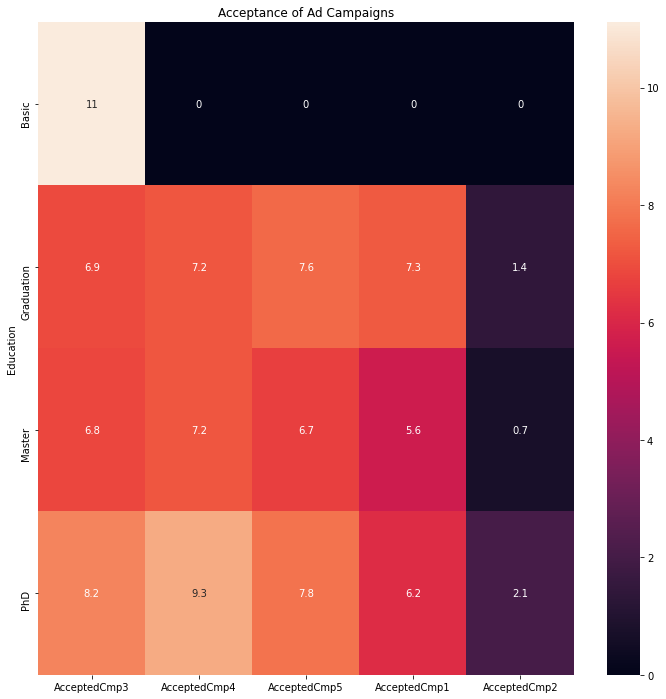

In [17]:
plt.figure(figsize=(12,12))
plt.title('Acceptance of Ad Campaigns')
sns.heatmap(data = education_means, annot= True)

Text(0.5, 0, 'Ad Campaign')

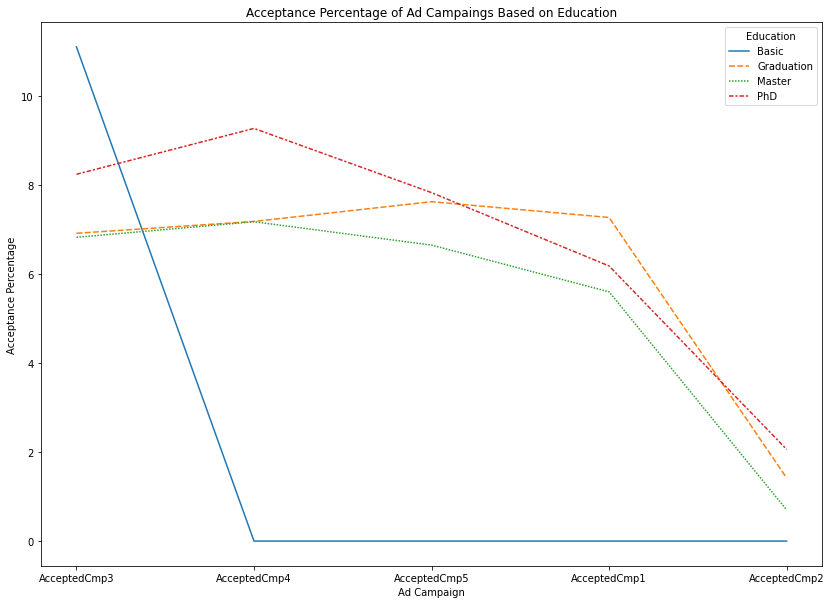

In [15]:
education_meanstr = education_means.transpose()
education_meanstr
plt.figure(figsize=(14,10))
plt.title("Acceptance Percentage of Ad Campaings Based on Education")
sns.lineplot(data = education_meanstr)
plt.ylabel('Acceptance Percentage')
plt.xlabel('Ad Campaign')


From these two graphs we can see that people who obtain a PhD usually have a higher percentage of acceptance among the different ad campaigns. We can see that the acceptance rate for the 3rd ad campaign is really high, but this is most likely because we have a very small sample size.

In [16]:
df.groupby('Education').size()

Education
Basic           54
Graduation    1127
Master         571
PhD            485
dtype: int64

We can see that there were only 54 people who obtained a basic education in our data, which means we might not be getting a very good representaive of this population. What we could do is bootstrap our samples and come up with a confidence interval for the mean, but the problem with doing this is we don't know if the sample is a good representative of the actual population so i'll refrain from doing this. Since we do not have a lot of data on people with a basic education level, we'll refrain making any conclusions about them. 

From the plot above, we notice that most education levels accept each ad campaign within a few percent of each other. In general though, people with a PhD are slightly more likely to accept an ad campain. We can also see that most people in the data tend to accept ad campaings 3,4, and 5 more than 1 and 2, although this might not necesarily be due to education level since most education levels are very close in acceptance percentages for each candidate. We'll explore a little further and see if marital status has anything to do with how someone might accept an ad.

In [22]:
relationship = df.groupby('Marital_Status').mean()
relationship = relationship.iloc[:, 17:22]
relationship = relationship.apply(convert_to_percent)
relationship

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
Marital_Status,,,,,
Divorced,8.658009,7.792208,5.627706,5.194805,2.164502
Married,7.291667,7.291667,7.638889,7.291667,0.810185
Single,8.024691,6.790123,6.584362,6.584362,1.028807
Together,6.390328,7.426598,7.426598,5.526770,2.072539
Widow,5.194805,12.987013,10.389610,6.493506,1.298701


<AxesSubplot:ylabel='Marital_Status'>

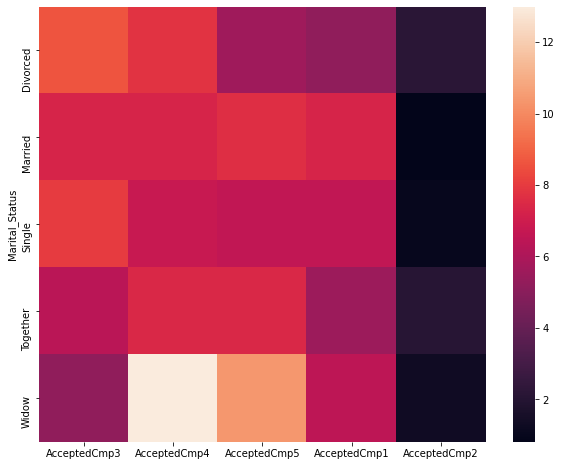

In [27]:
plt.figure(figsize=(10,8))

sns.heatmap(data =relationship)

<AxesSubplot:>

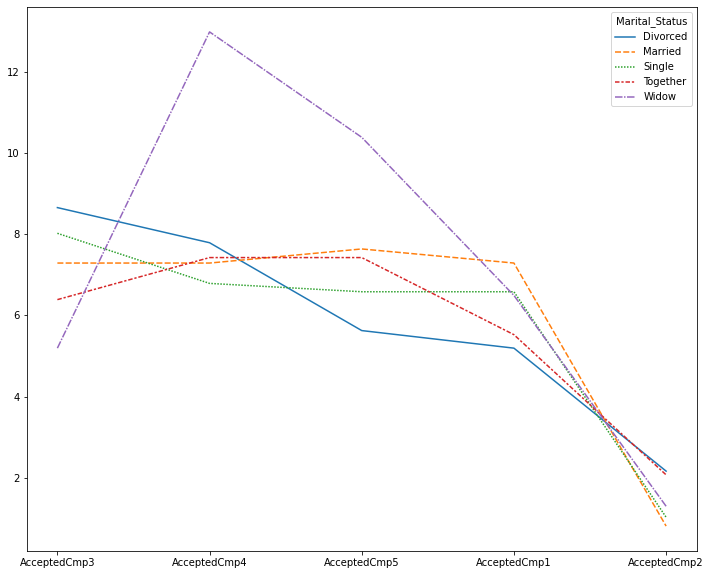

In [30]:
relationshiptr = relationship.transpose()
plt.figure(figsize=(12,10))
sns.lineplot(data = relationshiptr)

In [32]:
df.groupby('Marital_Status').size()

Marital_Status
Divorced    231
Married     864
Single      486
Together    579
Widow        77
dtype: int64

While it's important to note that the sample size for widows is fairly small, the data seems like it could be accurate because it's going with the similar trend for other ad campaigns and doesn't have values all over the place. Therefore, it would be reasonable to say that ad campaigns 4 and 5 were much more effective on people who have been widowed. 